In [14]:
import pandas as pd
import datetime
import pickle
import binascii

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
from collections import Counter

In [17]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [20]:
!pip install Kqlmagic --no-cache-dir  --upgrade

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


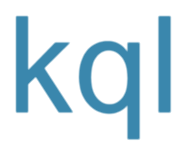

In [4]:
%reload_ext Kqlmagic

In [5]:
%kql AzureDataExplorer://tenant="Unilever.com";code;cluster='dfazuredataexplorer.westeurope';database='dfdataviewer'

<IPython.core.display.Javascript object>

In [6]:
%%kql
let stime = now(-10d);
let etime = now();
let MachineID= "901932";
Common2
|where MachineId ==MachineId
|where  TS between (stime..etime) and Tag has_any(
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure1",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure2",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure3",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Temperature1",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Conductivity",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_216536_SONO7_SONOLATE_Running")
| summarize arg_max(TS, Value) by bin(TS, 2m), Tag // summarizes the value by hour
| sort by Tag, TS asc
| parse Tag with *"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_" Test
| evaluate pivot(Test, max(Value),TS)

TS,216536_SONO7_SONOLATE_Running,901932_Conductivity,901932_Pressure1,901932_Pressure2,901932_Pressure3,901932_Temperature1
2023-05-19 21:58:00+00:00,0,0.07,0.1,-1,-0.1,23.5
2023-05-19 22:02:00+00:00,1,0.07,0.1,-1,-0.1,23.5
2023-05-19 21:32:00+00:00,0,0.07,0.1,-1,-0.1,23.5
2023-05-19 21:12:00+00:00,0,0.07,0.1,-1,-0.1,23.5
2023-05-19 20:54:00+00:00,0,0.07,0.1,-1,-0.1,23.5
2023-05-19 20:56:00+00:00,0,0.07,0.1,-1,-0.1,23.5
2023-05-19 20:14:00+00:00,0,0.07,0.1,-1,-0.1,23.5
2023-05-19 20:16:00+00:00,0,0.07,0.1,-1,-0.1,23.5
2023-05-19 20:26:00+00:00,0,0.07,0.1,-1,-0.1,23.5
2023-05-19 20:28:00+00:00,0,0.07,0.1,-1,-0.1,23.5


[{'TS': datetime.datetime(2023, 5, 19, 21, 58, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 22, 2, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '1', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 21, 32, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 21, 12, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 54, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 56, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 14, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 16, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 26, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 28, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 30, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 32, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 24, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 22, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 38, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 20, 40, tzinfo=tzutc()), '216536_SONO7_SONOLATE_Running': '0', '901932_Conductivity': '0.07', '901932_Pressure1': '0.1', '901932_Pressure2': '-1', '901932_Pressure3': '-0.1', '901932_Temperature1': '23.5'},
 {'TS': datetime.datetime(2023, 5, 19, 21, 2, tzinfo=tzutc()), '2

In [7]:
df = _kql_raw_result_.to_dataframe()
df.head(30)

,TS,216536_SONO7_SONOLATE_Running,901932_Conductivity,901932_Pressure1,901932_Pressure2,901932_Pressure3,901932_Temperature1
0,2023-05-19 21:58:00+00:00,0,0.07,0.1,-1,-0.1,23.5
1,2023-05-19 22:02:00+00:00,1,0.07,0.1,-1,-0.1,23.5
2,2023-05-19 21:32:00+00:00,0,0.07,0.1,-1,-0.1,23.5
3,2023-05-19 21:12:00+00:00,0,0.07,0.1,-1,-0.1,23.5
4,2023-05-19 20:54:00+00:00,0,0.07,0.1,-1,-0.1,23.5
5,2023-05-19 20:56:00+00:00,0,0.07,0.1,-1,-0.1,23.5
6,2023-05-19 20:14:00+00:00,0,0.07,0.1,-1,-0.1,23.5
7,2023-05-19 20:16:00+00:00,0,0.07,0.1,-1,-0.1,23.5
8,2023-05-19 20:26:00+00:00,0,0.07,0.1,-1,-0.1,23.5
9,2023-05-19 20:28:00+00:00,0,0.07,0.1,-1,-0.1,23.5


In [8]:
print(df.shape, "\n")
print(df[-4:])

(7200, 7) 

                            TS 216536_SONO7_SONOLATE_Running  \
7196 2023-05-24 02:00:00+00:00                             0   
7197 2023-05-24 02:02:00+00:00                             0   
7198 2023-05-24 01:58:00+00:00                             0   
7199 2023-05-24 02:10:00+00:00                             1   

     901932_Conductivity 901932_Pressure1 901932_Pressure2 901932_Pressure3  \
7196                0.07              0.1               -1             -0.1   
7197                0.07              0.1               -1             -0.1   
7198                0.07              0.1               -1             -0.1   
7199                0.07              0.1               -1             -0.1   

     901932_Temperature1  
7196                23.5  
7197                23.5  
7198                23.5  
7199                23.5  


In [9]:
df.columns

Index(['TS', '216536_SONO7_SONOLATE_Running', '901932_Conductivity',
       '901932_Pressure1', '901932_Pressure2', '901932_Pressure3',
       '901932_Temperature1'],
      dtype='object')

In [10]:
df_new = df.rename(columns={'TS': 'Timestamp','216536_SONO7_SONOLATE_Running':'Sono_Run','901932_Conductivity':'Conductivity',
                           '901932_Pressure1':'Pressure1','901932_Pressure2':'Pressure2','901932_Pressure3':'Pressure3',
                           '901932_Temperature1':'Temperature1'})
print(df_new)

                     Timestamp Sono_Run Conductivity Pressure1 Pressure2  \
0    2023-05-19 21:58:00+00:00        0         0.07       0.1        -1   
1    2023-05-19 22:02:00+00:00        1         0.07       0.1        -1   
2    2023-05-19 21:32:00+00:00        0         0.07       0.1        -1   
3    2023-05-19 21:12:00+00:00        0         0.07       0.1        -1   
4    2023-05-19 20:54:00+00:00        0         0.07       0.1        -1   
...                        ...      ...          ...       ...       ...   
7195 2023-05-24 01:56:00+00:00        1         0.07       0.1        -1   
7196 2023-05-24 02:00:00+00:00        0         0.07       0.1        -1   
7197 2023-05-24 02:02:00+00:00        0         0.07       0.1        -1   
7198 2023-05-24 01:58:00+00:00        0         0.07       0.1        -1   
7199 2023-05-24 02:10:00+00:00        1         0.07       0.1        -1   

     Pressure3 Temperature1  
0         -0.1         23.5  
1         -0.1         23.5

In [11]:
df_new.head(10)


,Timestamp,Sono_Run,Conductivity,Pressure1,Pressure2,Pressure3,Temperature1
0,2023-05-19 21:58:00+00:00,0,0.07,0.1,-1,-0.1,23.5
1,2023-05-19 22:02:00+00:00,1,0.07,0.1,-1,-0.1,23.5
2,2023-05-19 21:32:00+00:00,0,0.07,0.1,-1,-0.1,23.5
3,2023-05-19 21:12:00+00:00,0,0.07,0.1,-1,-0.1,23.5
4,2023-05-19 20:54:00+00:00,0,0.07,0.1,-1,-0.1,23.5
5,2023-05-19 20:56:00+00:00,0,0.07,0.1,-1,-0.1,23.5
6,2023-05-19 20:14:00+00:00,0,0.07,0.1,-1,-0.1,23.5
7,2023-05-19 20:16:00+00:00,0,0.07,0.1,-1,-0.1,23.5
8,2023-05-19 20:26:00+00:00,0,0.07,0.1,-1,-0.1,23.5
9,2023-05-19 20:28:00+00:00,0,0.07,0.1,-1,-0.1,23.5


In [12]:
print(df_new.shape, "\n")
print(df_new[-4:])

(7200, 7) 

                     Timestamp Sono_Run Conductivity Pressure1 Pressure2  \
7196 2023-05-24 02:00:00+00:00        0         0.07       0.1        -1   
7197 2023-05-24 02:02:00+00:00        0         0.07       0.1        -1   
7198 2023-05-24 01:58:00+00:00        0         0.07       0.1        -1   
7199 2023-05-24 02:10:00+00:00        1         0.07       0.1        -1   

     Pressure3 Temperature1  
7196      -0.1         23.5  
7197      -0.1         23.5  
7198      -0.1         23.5  
7199      -0.1         23.5  


In [18]:
df3 = pd.DataFrame(df_new, columns=['Timestamp','Sono_Run','Conductivity','Pressure1','Pressure2','Pressure3','Temperature1'])

In [19]:
df3.head()

,Timestamp,Sono_Run,Conductivity,Pressure1,Pressure2,Pressure3,Temperature1
0,2023-05-19 21:58:00+00:00,0,0.07,0.1,-1,-0.1,23.5
1,2023-05-19 22:02:00+00:00,1,0.07,0.1,-1,-0.1,23.5
2,2023-05-19 21:32:00+00:00,0,0.07,0.1,-1,-0.1,23.5
3,2023-05-19 21:12:00+00:00,0,0.07,0.1,-1,-0.1,23.5
4,2023-05-19 20:54:00+00:00,0,0.07,0.1,-1,-0.1,23.5


In [81]:
data=df_new[(df3.Sono_Run != 0)]

In [82]:
data.head()

,Timestamp,Sono_Run,Conductivity,Pressure1,Pressure2,Pressure3,Temperature1
0,2023-05-19 21:58:00+00:00,0,0.07,0.1,-1,-0.1,23.5
1,2023-05-19 22:02:00+00:00,1,0.07,0.1,-1,-0.1,23.5
2,2023-05-19 21:32:00+00:00,0,0.07,0.1,-1,-0.1,23.5
3,2023-05-19 21:12:00+00:00,0,0.07,0.1,-1,-0.1,23.5
4,2023-05-19 20:54:00+00:00,0,0.07,0.1,-1,-0.1,23.5


In [83]:
data.replace('0', np.nan, inplace=True)
data.head()

,Timestamp,Sono_Run,Conductivity,Pressure1,Pressure2,Pressure3,Temperature1
0,2023-05-19 21:58:00+00:00,NaN,0.07,0.1,-1,-0.1,23.5
1,2023-05-19 22:02:00+00:00,1,0.07,0.1,-1,-0.1,23.5
2,2023-05-19 21:32:00+00:00,NaN,0.07,0.1,-1,-0.1,23.5
3,2023-05-19 21:12:00+00:00,NaN,0.07,0.1,-1,-0.1,23.5
4,2023-05-19 20:54:00+00:00,NaN,0.07,0.1,-1,-0.1,23.5


In [85]:
data.dropna(inplace=True)
data.head(10)

,Timestamp,Sono_Run,Conductivity,Pressure1,Pressure2,Pressure3,Temperature1
1,2023-05-19 22:02:00+00:00,1,0.07,0.1,-1,-0.1,23.5
19,2023-05-19 22:00:00+00:00,1,0.07,0.1,-1,-0.1,23.5
26,2023-05-17 19:54:00+00:00,1,0.07,0.1,-1,-0.1,23.5
31,2023-05-17 19:02:00+00:00,1,0.07,0.1,-1,-0.1,23.5
32,2023-05-17 18:48:00+00:00,1,0.07,0.1,-1,-0.1,23.5
34,2023-05-17 18:50:00+00:00,1,0.07,0.1,-1,-0.1,23.5
36,2023-05-17 19:04:00+00:00,1,0.07,0.1,-1,-0.1,23.5
37,2023-05-17 19:16:00+00:00,1,0.07,0.1,-1,-0.1,23.5
38,2023-05-17 19:18:00+00:00,1,0.07,0.1,-1,-0.1,23.5
39,2023-05-17 19:20:00+00:00,1,0.07,0.1,-1,-0.1,23.5


In [86]:
X = data.drop(["Sono_Run","Timestamp"], axis=1)

X = pd.get_dummies(X)

# Create our target
y = data["Temperature1"]

In [87]:
X.describe()

,Conductivity_0.07,Pressure1_,Pressure1_0.1,Pressure2_,Pressure2_-1,Pressure3_-0.1,Temperature1_23.5
count,2053.0,2053.000000,2053.000000,2053.000000,2053.000000,2053.0,2053.0
mean,1.0,0.000487,0.999513,0.000487,0.999513,1.0,1.0
std,0.0,0.022070,0.022070,0.022070,0.022070,0.0,0.0
min,1.0,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,1.0,0.000000,1.000000,0.000000,1.000000,1.0,1.0
50%,1.0,0.000000,1.000000,0.000000,1.000000,1.0,1.0
75%,1.0,0.000000,1.000000,0.000000,1.000000,1.0,1.0
max,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [88]:
X.shape

(2053, 7)

In [89]:
# Check the balance of our target values
y.value_counts()

23.5    2053
Name: Temperature1, dtype: int64

In [90]:
# splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [91]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(1642, 7) (411, 7) (1642,) (411,)


In [92]:
print(y_train.shape)

(1642,)


In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
random_forest = RandomForestRegressor(n_estimators = 25, random_state =25)

In [95]:
#Fitting the model
Temp_rf= random_forest.fit(X_train, y_train)

In [96]:
#Training model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [97]:
# The training r_sq
print('The training r_sq is: %.2f'% Temp_rf.score(X_train, y_train))

The training r_sq is: 1.00


In [98]:
# Prediction on the training dataset
ytrain_pred = Temp_rf.predict(X_train)

In [99]:
# The MAE
print('The MAE is: %.2f'% mean_absolute_error(y_train, ytrain_pred))

The MAE is: 0.00


In [100]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_train, ytrain_pred))

The MSE is: 0.00


In [101]:
# THe RMSE
import numpy as np
print('The RME is %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The RME is 0.00


In [102]:
# The EVS 
print('The EVS is: %.2f'% explained_variance_score(y_train, ytrain_pred))

The EVS is: 1.00


In [104]:
#Prediction on the testing data
ytest_pred = Temp_rf.predict(X_test)

In [105]:
print(ytest_pred[:10])

[23.5 23.5 23.5 23.5 23.5 23.5 23.5 23.5 23.5 23.5]


In [106]:
#The testing coef. of determination
print('The testing r_sq is: %.2f'% r2_score(y_test, ytest_pred))

The testing r_sq is: 1.00


In [107]:
# Or
print('The testing r_sq is: %.2f'% Temp_rf.score(X_test, y_test))

The testing r_sq is: 1.00


In [108]:
# The metrics

In [109]:
# The MAE
print('The MAE is: %.2f'% mean_absolute_error(y_test, ytest_pred))

The MAE is: 0.00


In [110]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_test, ytest_pred))

The MSE is: 0.00


In [111]:
# The RMSE
print('The RMSE:',np.sqrt(mean_squared_error(y_test, ytest_pred)))

The RMSE: 0.0


In [112]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_test, ytest_pred))

The EVS is: 1.00


<function matplotlib.pyplot.show(close=None, block=None)>

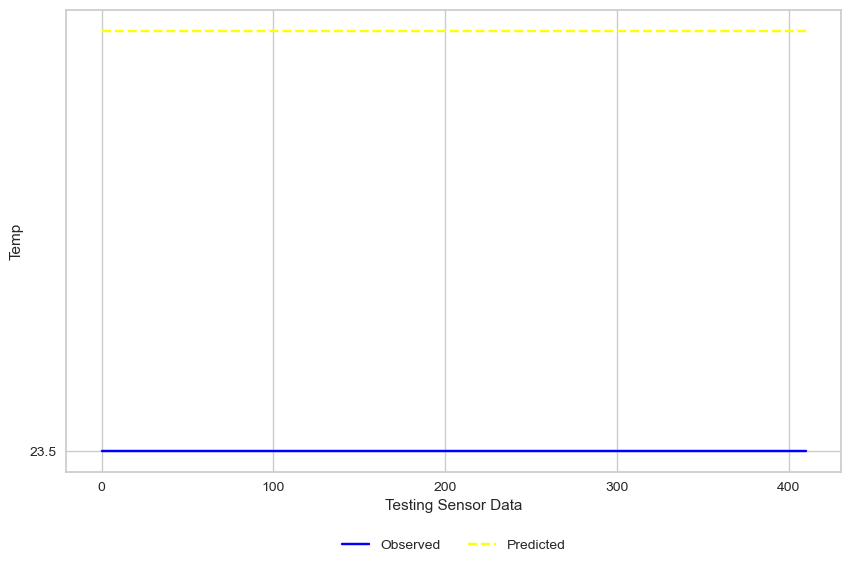

In [113]:
#Plotting the observed and predicted data
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] =(10,6)
x_ax = range(len(X_test))
#Plotting
plt.plot(x_ax, y_test, label = 'Observed', color ='blue', linestyle ='-')
plt.plot(x_ax, ytest_pred, label = 'Predicted', color ='yellow', linestyle = '--')
plt.ylabel('Temp')
plt.xlabel('Testing Sensor Data')
plt.legend(bbox_to_anchor =(0.5, -0.2), loc ='lower center', ncol =2, frameon = False)
plt.show

In [64]:
!pip install yellowbrick

In [114]:
#Plotting the prediction errors and residuals using yellowbrick
# Anaconda/Cmd prompt and type : pip install yellowbrick

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

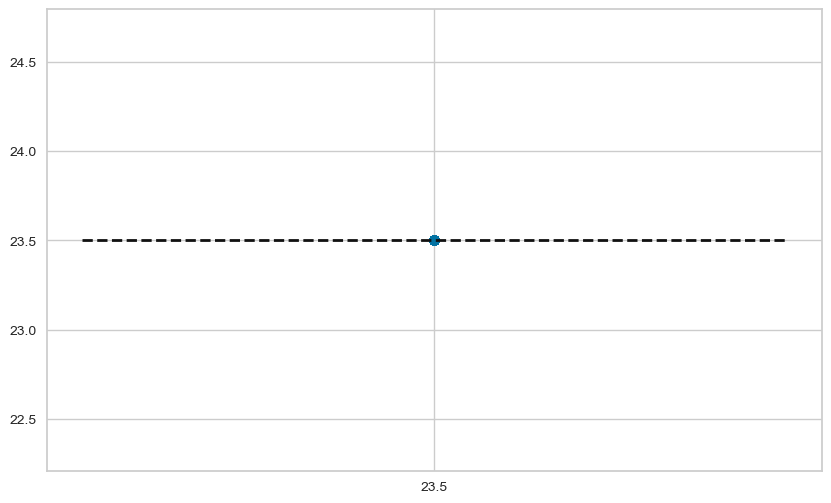

In [115]:
#Plotting the prediction errors
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
#from yellowbrick.regressor import proof
visualizer = PredictionError(Temp_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.proof()

TypeError: unsupported operand type(s) for -: 'float' and 'str'

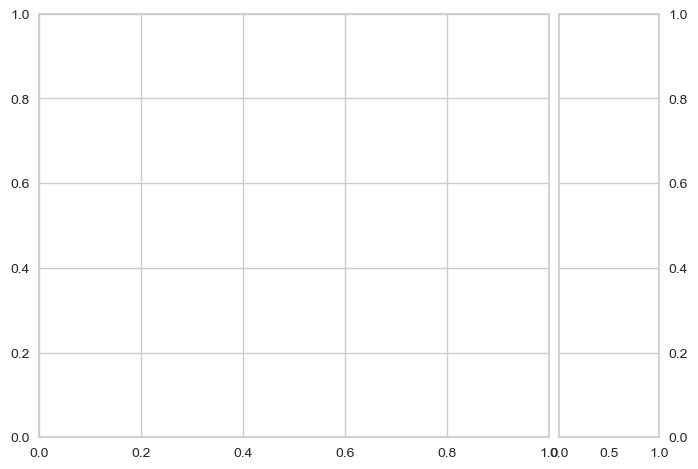

In [66]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
#from yellowbrick.regressor import proof
visualizer = ResidualsPlot(Temp_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.proof()

In [67]:
# The k-folds CV
from sklearn.model_selection import cross_val_score

In [68]:
seed =7

In [70]:
# Training model CV
score_train = cross_val_score(Temp_rf, X_train, y_train, scoring ="neg_mean_squared_error", cv=10)
score_train

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])

In [71]:
# The mean score
print(np.mean(score_train))

0.0


In [72]:
# The  absolutevmean score
from numpy import absolute
print(absolute(np.mean(score_train)))

0.0


In [74]:
# The testing model CV
score_test = cross_val_score(Temp_rf,X_test, y_test, scoring = 'neg_mean_squared_error', cv=10)
score_test

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])

In [75]:
print(absolute(np.mean(score_test)))

0.0


In [76]:
# Random Forest Feature Ranking
#import pandas as pd
from sklearn.pipeline import Pipeline

In [78]:
f_list = list(X.columns)
f_importance = pd.Series(Temp_rf.feature_importances_,index= f_list).sort_values(ascending =False)

In [79]:
print(f_importance)

Conductivity_0.07    0.0
Pressure1_           0.0
Pressure1_0.1        0.0
Pressure2_           0.0
Pressure2_-1         0.0
Pressure3_-0.1       0.0
Temperature1_23.5    0.0
dtype: float64


In [80]:
# List the features sorted in descending order by feature importance
feature_names = X.columns
sorted(zip(random_forest.feature_importances_, feature_names), reverse=True)

[(0.0, 'Temperature1_23.5'),
 (0.0, 'Pressure3_-0.1'),
 (0.0, 'Pressure2_-1'),
 (0.0, 'Pressure2_'),
 (0.0, 'Pressure1_0.1'),
 (0.0, 'Pressure1_'),
 (0.0, 'Conductivity_0.07')]